## Import Library

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [54]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [55]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Lebar Jalan Depan Rumah (ROW)": "Row"})
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Row
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [56]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [57]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Area Category                 308 non-null    object
 1   Nama Daerah                   308 non-null    object
 2   Luas Tanah (m2)               308 non-null    int64 
 3   Luas Bangunan (m2)            308 non-null    int64 
 4   Jumlah Kamar                  308 non-null    int64 
 5   Jumlah Kamar Mandi            308 non-null    int64 
 6   Tingkat/Lantai                308 non-null    int64 
 7   Harga Penawaran (dari Owner)  308 non-null    int64 
 8   Terjual/Belum                 308 non-null    object
 9   Arah Hadap Rumah              308 non-null    object
 10  Posisi Rumah                  308 non-null    object
 11  Row                           308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [58]:
# drop Terjual/Belum because all the value only contains "Belum"
df = df.drop('Terjual/Belum', axis=1)

All of the values on the dataset is cleaned (no null value)

In [59]:
# Display all the unique values
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())
    print(f"Unique count: {df[col].nunique()}")


Column: Area Category
['Standard' 'Below Standard' 'Sangat Premium' 'Premium']
Unique count: 4

Column: Nama Daerah
['Citraland' 'Setro Baru Utara' 'Kenjeran' 'Gubeng' 'Sawahan' 'Mulyorejo'
 'Tegalsari' 'Tambaksari' 'Kalilom Lor Timur' 'Jelidro Manukan' 'Kalilom'
 'Bulak Cumpat barat' 'Tambak Wedi' 'Lebak Jaya'
 'Simo Gunung Kramat Timur' 'Medokan Ayu' 'Lebak Rejo' 'Medokan Sawah'
 'Klampis Ngasem' 'Medokan Sawah Timur' 'Citraland Golf Avenue'
 'Wisata Semanggi' 'Kedung Klinter' 'Gading Indah Regency'
 'Gunung Anyar Mas' 'Kutisari Utara' 'Mulyosari Tengah' 'Kapas Madya'
 'Bratang Gede' 'Citraland Utara' 'Lebak Jaya Utara' 'Mulyosari Timur'
 'Pakuwon City' 'Pakuwon city' 'Pakuwon City Florence' 'Pantai Mentari'
 'Royal Residence' 'Villa Kalijudan Indah' 'Sutorejo Timur'
 'Springville Residence' 'Sukomanunggal' 'Surabaya Pusat' 'Su' 'Mulyosari'
 'Krukah Selatan' 'Mulyosari Utara' 'Pondok Benowo Indah' 'Kenjeran Indah'
 'Tenggilis' 'Wisma Mukti' 'wonokromo' 'Sakura Regency Ketintang'
 'P

##  Exploratory Data Analysis & Data Preparation

### Feature Encoding

In [60]:
from sklearn.preprocessing import OrdinalEncoder
import pprint

# Copy dataset
df_encoded = df.copy()

# Define categorical columns manually
cat_cols = [
    'Nama Daerah',
    'Arah Hadap Rumah',
    'Posisi Rumah',
    'Row',
    'Area Category'
]

df_encoded[cat_cols] = df_encoded[cat_cols].astype(str)

# Apply Ordinal Encoding
encoder = OrdinalEncoder()
df_encoded[cat_cols] = encoder.fit_transform(df_encoded[cat_cols])

encode_dict = {
    col: {category: int(code) for code, category in enumerate(categories)}
    for col, categories in zip(cat_cols, encoder.categories_)
}

pprint.pprint(encode_dict)

df_encoded.sample(n=5)


{'Arah Hadap Rumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'Area Category': {'Below Standard': 0,
                   'Premium': 1,
                   'Sangat Premium': 2,
                   'Standard': 3},
 'Nama Daerah': {'Anjasmoro': 0,
                 'Araya': 1,
                 'Asemrowo': 2,
                 'Babatan': 3,
                 'Babatan Pantai': 4,
                 'Baratajaya': 5,
                 'Bendul Merisi': 6,
                 'Bratang Gede': 7,
                 'Bubutan': 8,
                 'Bulak Cumpat barat': 9,
                 'Ciliwung': 10,
                 'Citraland': 11,
                 'Citraland ': 12,
                 'Citraland Golf Avenue': 13,
                 'Citraland Utara': 14,
                 'Darmahusada': 15,
                 'Darmo': 16,
                 'Darmo Permai': 17,
                 'Diponegoro': 18,
                 'Dukuh Pakis': 19,
                 'Dukuh Sutorejo': 20,
                 'Gading': 21,
    

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Row
119,3.0,42.0,240,350,13,13,2,2750000000,1.0,2.0,2.0
234,0.0,88.0,208,150,3,2,1,1880000000,3.0,2.0,0.0
46,3.0,111.0,18,36,2,1,2,250000000,3.0,2.0,0.0
150,2.0,27.0,900,1100,6,5,2,58000000000,3.0,3.0,2.0
72,1.0,82.0,180,232,4,4,2,4500000000,1.0,2.0,0.0


In [61]:
for col in cat_cols:
    print(f"{col}: {df_encoded[col].unique()}")

Nama Daerah: [ 11. 100.  48.  30.  98.  73. 114. 112.  39.  36.  38.   9. 111.  58.
 101.  69.  60.  70.  53.  71.  13. 120.  45.  22.  31.  56.  75.  40.
   7.  14.  59.  76.  82.  85.  83.  86.  94. 118. 109. 103. 106. 107.
 104.  74.  54.  77.  89.  49. 115. 121. 125.  97.  91.  67.   4.  79.
   6.  29. 110.  96.  25. 122.  87.  42.  65.  64.  12.  66.   1.  28.
  37.  23.  51.  50.   0.  27.  35.  78. 113. 108.  63.  99.  95.  55.
  61.  32.  84.  17. 119.  44. 105.  47.  52. 123.  93.  88.  26.  68.
  92.  18.  20.  57.  62.  15.  24.  21.  10.   8.  16.  34.  81.  43.
  46.  41. 102.   3.   5. 124.  72.  90.  33.  80.   2. 116.  19. 117.]
Arah Hadap Rumah: [3. 1. 0. 2.]
Posisi Rumah: [2. 0. 3. 1. 4.]
Row: [0. 1. 2.]
Area Category: [3. 0. 2. 1.]


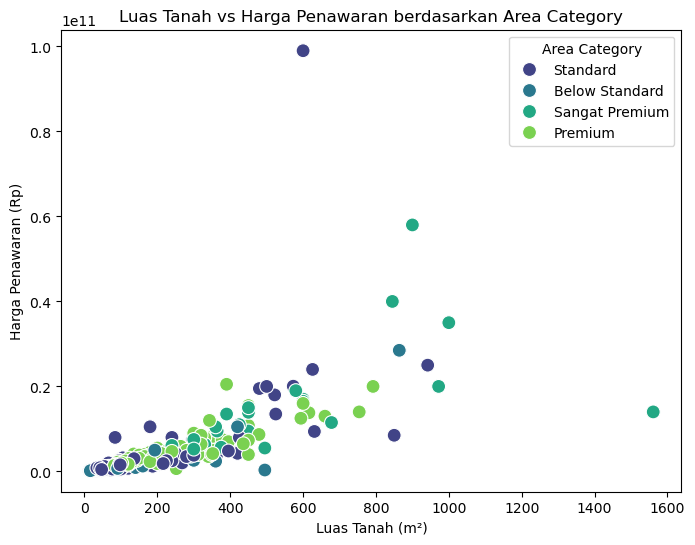

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Luas Tanah (m2)',y='Harga Penawaran (dari Owner)', hue='Area Category',
    data=df, palette='viridis', s=100)
plt.title('Luas Tanah vs Harga Penawaran berdasarkan Area Category')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga Penawaran (Rp)')
plt.show()


This shows a clear positive relationship between land area and property price, where larger plots generally correspond to higher prices. We could see that both land size and area category strongly influence property value.

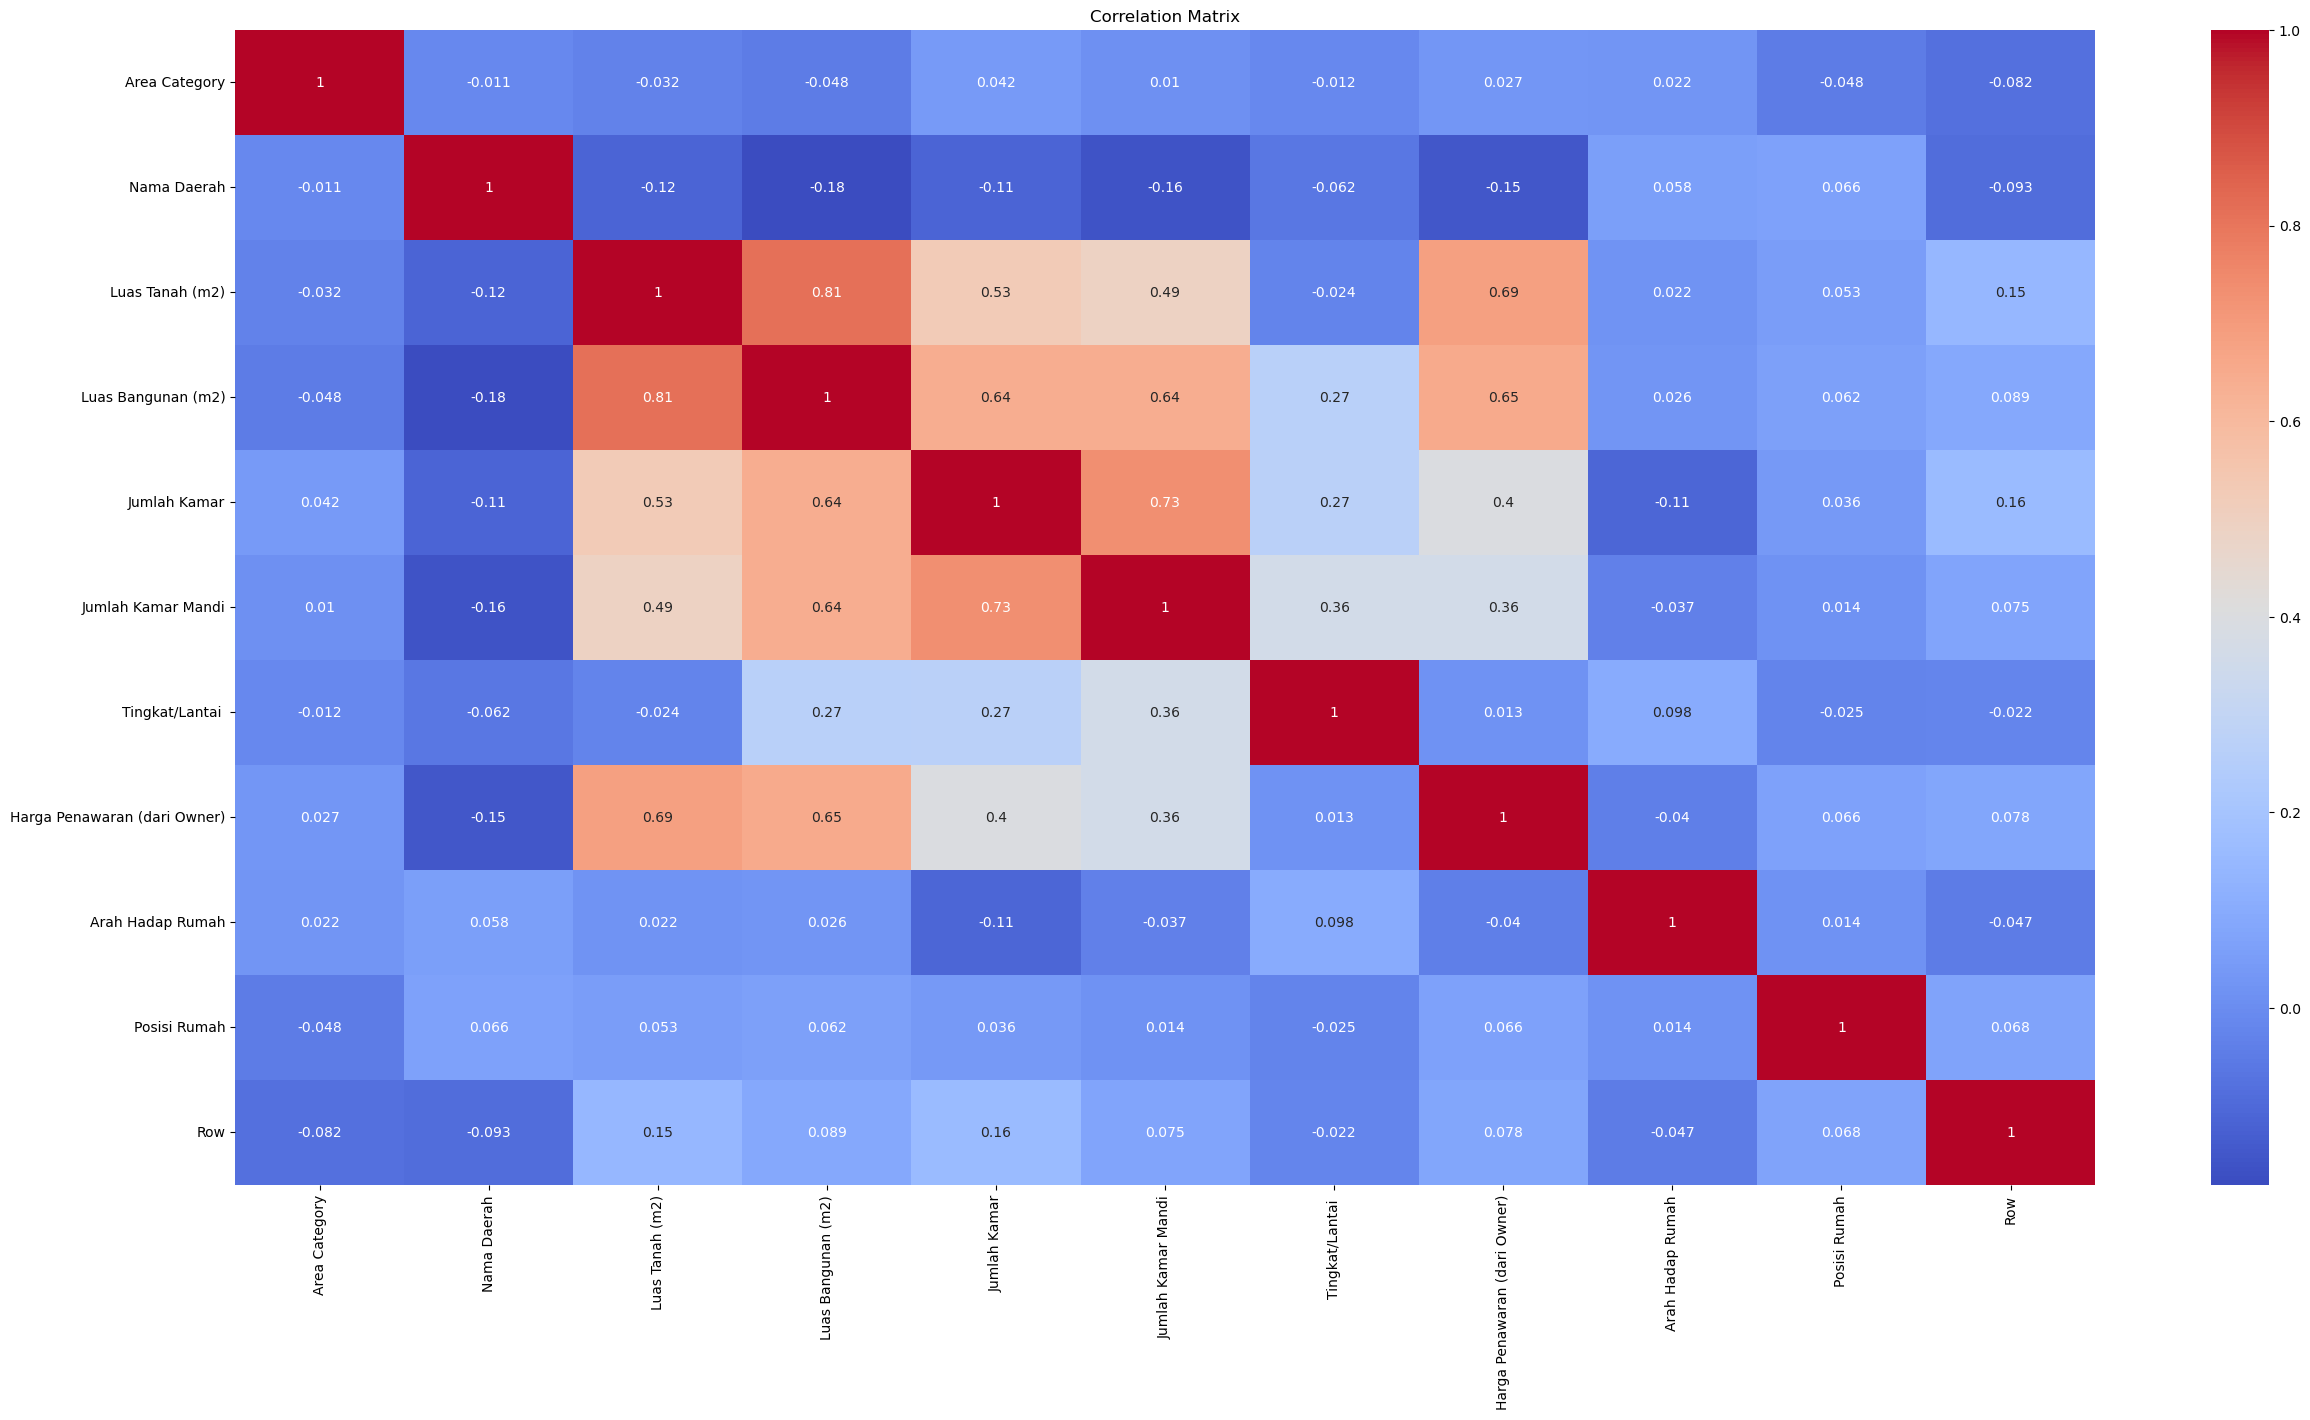

In [63]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation heatmap is showing strong positive correlations between land area, building size, and price. As well as the least strong correlaction in between the variables.

In [64]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df_encoded.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[[
    'Luas Tanah (m2)',
    'Luas Bangunan (m2)',
    'Jumlah Kamar',
    'Jumlah Kamar Mandi',
    'Tingkat/Lantai ',
    'Harga Penawaran (dari Owner)'
]])

df_scaled = pd.DataFrame(df_scaled, columns=[   
    'Luas Tanah (m2)',
    'Luas Bangunan (m2)',
    'Jumlah Kamar',
    'Jumlah Kamar Mandi',
    'Tingkat/Lantai ',
    'Harga Penawaran (dari Owner)'
])
df_scaled.head()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [76]:
# Daftar kolom numerikal yang distandarisasi
num_cols = [
    'Luas Tanah (m2)',
    'Luas Bangunan (m2)',
    'Jumlah Kamar',
    'Jumlah Kamar Mandi',
    'Tingkat/Lantai ',
    'Harga Penawaran (dari Owner)'
]

# merge with the previous categorical encoding
df_final = pd.concat([
    df_scaled[num_cols],               
    df_encoded.drop(columns=num_cols) 
], axis=1)

df_final.head()


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Area Category,Nama Daerah,Arah Hadap Rumah,Posisi Rumah,Row
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,3.0,11.0,3.0,2.0,0.0
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,100.0,3.0,2.0,1.0
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,3.0,48.0,1.0,0.0,0.0
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,2.0,48.0,3.0,2.0,0.0
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,1.0,48.0,0.0,2.0,0.0


In [66]:
# get stastical information on the new dataset
df_final.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Area Category,Nama Daerah,Arah Hadap Rumah,Posisi Rumah,Row
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,308.000000,308.000000,308.000000,308.000000,308.000000
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17,1.876623,61.448052,2.152597,2.071429,0.788961
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.120307,36.863343,1.011059,0.380419,0.957199
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01,1.000000,29.750000,1.000000,2.000000,0.000000
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01,2.000000,63.500000,3.000000,2.000000,0.000000
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02,3.000000,94.000000,3.000000,2.000000,2.000000
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01,3.000000,125.000000,3.000000,4.000000,2.000000


## Silhouette Score

Skipping Ward linkage with Manhattan metric (not supported).


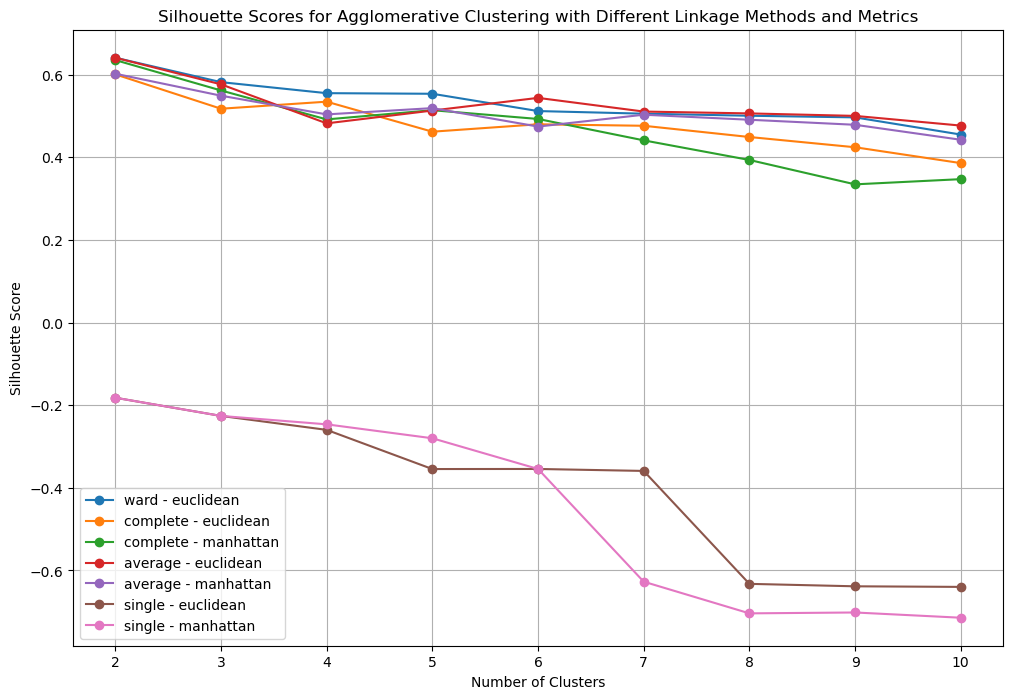

Best Silhouette Score: 0.6409577657640738
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [68]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_final)
            silhouette_avg = silhouette_score(df_final, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

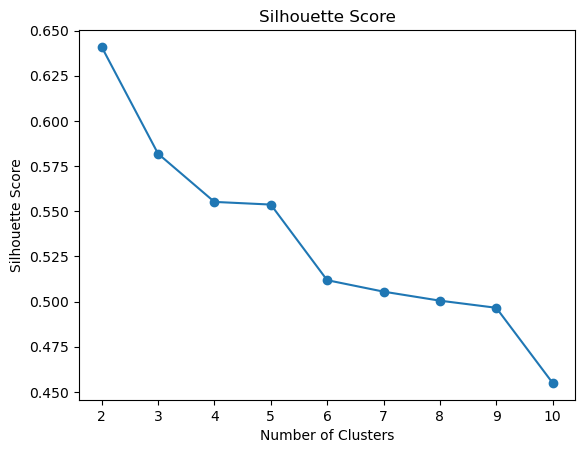

In [ ]:
# this is way to show only 1 sillhouette score (turns out its the same, the best and ward linkage)
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = agglo_model.fit_predict(df_final)
    silhouette_avg = silhouette_score(df_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Hierarchical Clustering Model

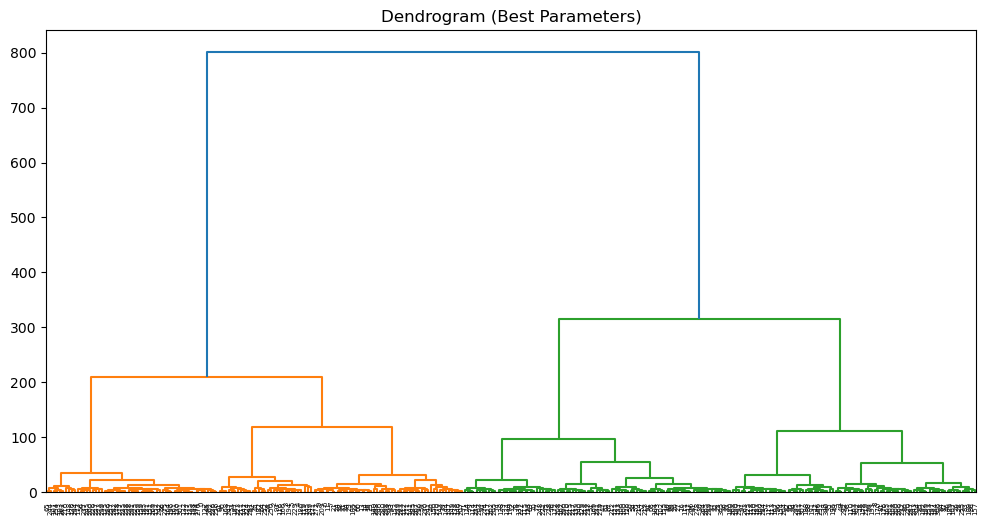

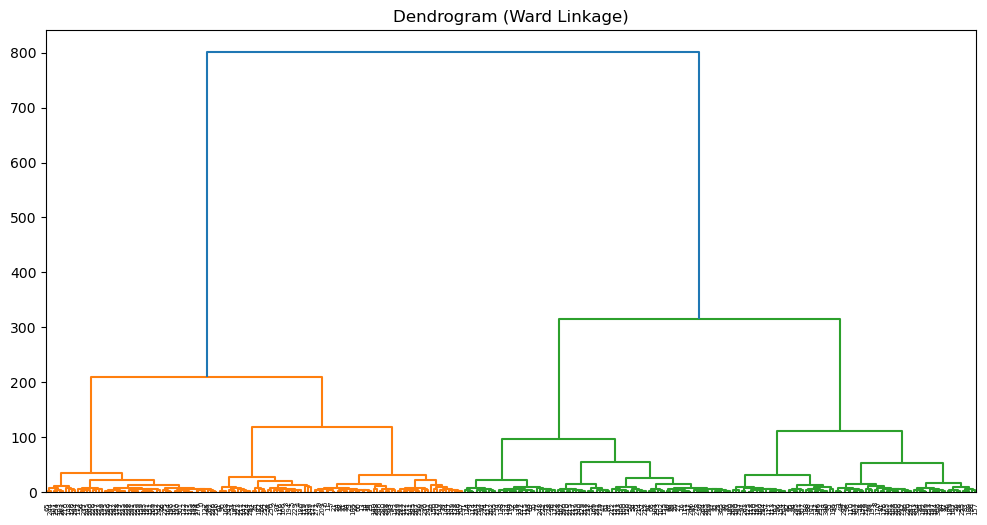

In [69]:
# Perform linkage for dendrogram visualization
linkage_model1 = linkage(df_final, method=best_linkage, metric=best_metric)
linkage_model2 = linkage(df_final, method='ward', metric='euclidean')  

# Generate dendrograms
plt.figure(figsize=(12, 6))
plt.title("Dendrogram (Best Parameters)")
dendrogram(linkage_model1)
plt.show()

plt.figure(figsize=(12, 6))
plt.title("Dendrogram (Ward Linkage)")
dendrogram(linkage_model2)
plt.show()

Most properties goes to model 1, while a model 2 shows different characteristics like smaller size or lower price. 

In [70]:
# Hierarchical Clustering
model1 = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
model2 = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')

labels_model1 = model1.fit_predict(df_final)
labels_model2 = model2.fit_predict(df_final)

In [71]:
# Merge cluster labels with the original dataset
df_clustered = df.copy()
df_clustered['Model 1'] = labels_model1
df_clustered['Model 2'] = labels_model2

df_clustered.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Row,Model 1,Model 2
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,1,1
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0,0
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,1,1
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,1,1
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,1,1


In [72]:
# Evaluation
ss = silhouette_score(df_final, labels_model1)
print(ss)

0.6409577657640738


## Comparison & Interpretation 

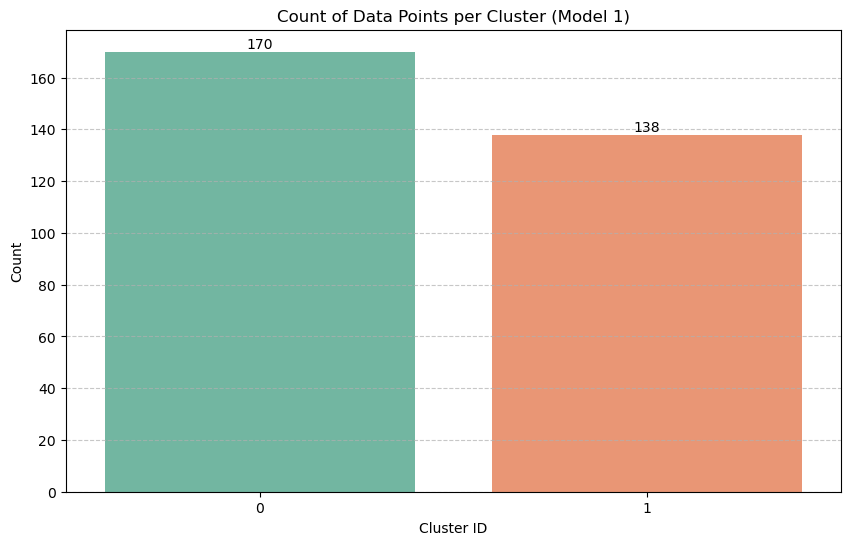

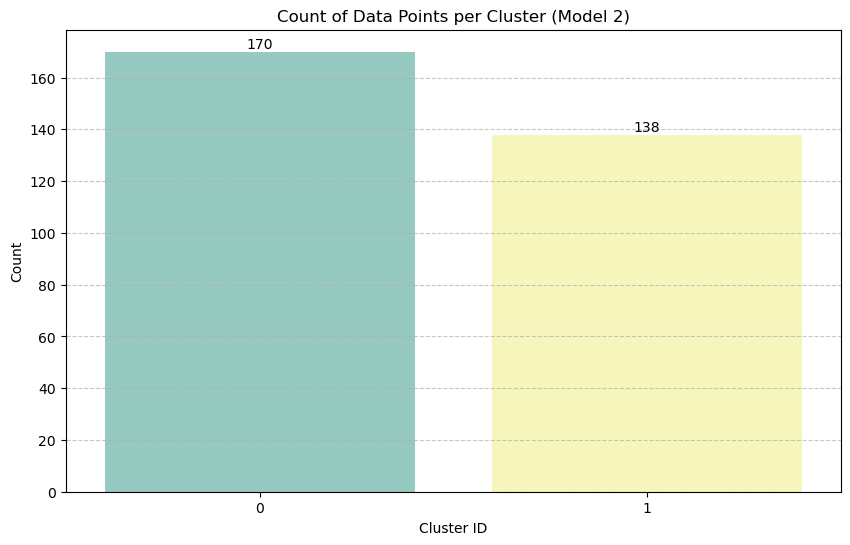

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# ===== Model 1 =====
cluster_counts_1 = df_clustered['Model 1'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=cluster_counts_1.index, y=cluster_counts_1.values, hue=cluster_counts_1.index, palette='Set2', legend=False)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge')
plt.title('Count of Data Points per Cluster (Model 1)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ===== Model 2 =====
cluster_counts_2 = df_clustered['Model 2'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x=cluster_counts_2.index, y=cluster_counts_2.values, hue=cluster_counts_2.index, palette='Set3', legend=False)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge')
plt.title('Count of Data Points per Cluster (Model 2)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


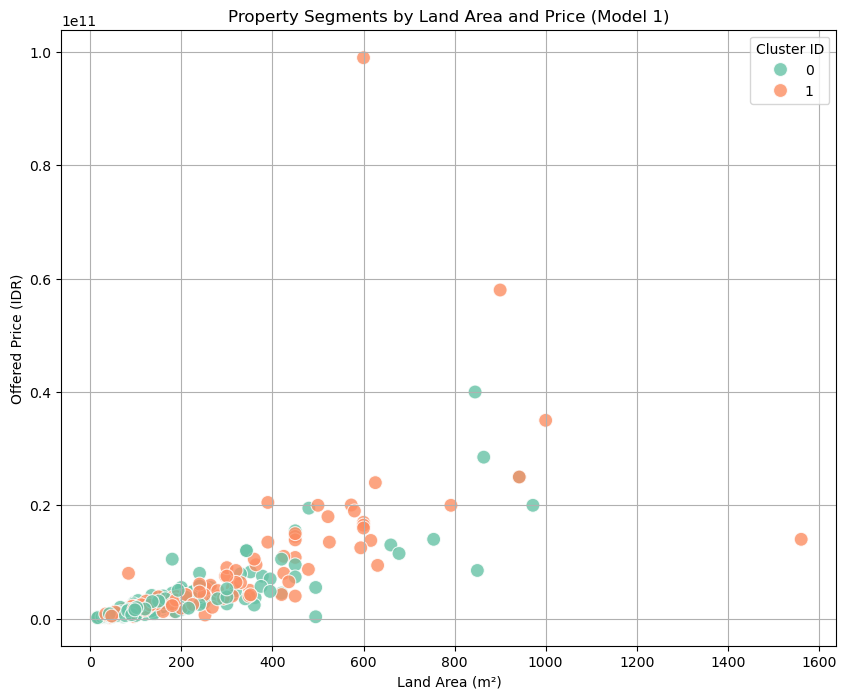

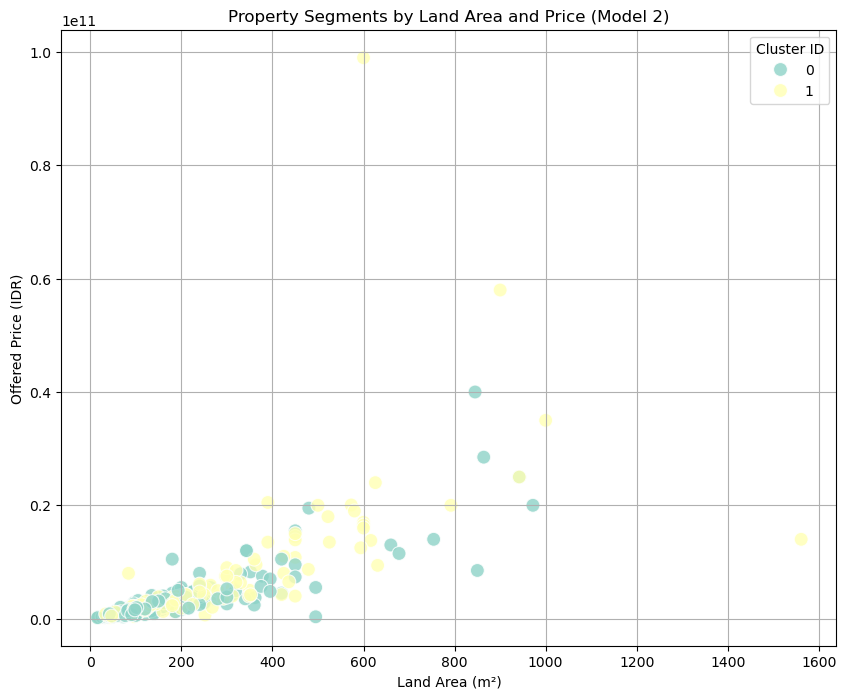

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# ===== Scatterplot for Model 1 =====
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_clustered,
    x='Luas Tanah (m2)',
    y='Harga Penawaran (dari Owner)',
    hue='Model 1',
    palette='Set2',
    s=100,
    alpha=0.8
)
plt.title('Property Segments by Land Area and Price (Model 1)')
plt.xlabel('Land Area (m²)')
plt.ylabel('Offered Price (IDR)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

# ===== Scatterplot for Model 2 =====
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_clustered,
    x='Luas Tanah (m2)',
    y='Harga Penawaran (dari Owner)',
    hue='Model 2',
    palette='Set3',
    s=100,
    alpha=0.8
)
plt.title('Property Segments by Land Area and Price (Model 2)')
plt.xlabel('Land Area (m²)')
plt.ylabel('Offered Price (IDR)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()


Both Model 1 and Model 2 produced the same size (since the best combination resulting the same value with ward linkage). 


In [75]:
def summary_stats(group):
    return pd.Series({
        'mean_land': group['Luas Tanah (m2)'].mean(),
        'median_land': group['Luas Tanah (m2)'].median(),
        'mode_land': group['Luas Tanah (m2)'].mode()[0],
        'mean_price': group['Harga Penawaran (dari Owner)'].mean(),
        'median_price': group['Harga Penawaran (dari Owner)'].median(),
        'mode_price': group['Harga Penawaran (dari Owner)'].mode()[0]
    })

summary_model1 = df_clustered.groupby('Model 1').apply(summary_stats)
summary_model2 = df_clustered.groupby('Model 2').apply(summary_stats)

print("Model 1:")
print(summary_model1)
print("\nModel 2:")
print(summary_model2)


Model 1:
          mean_land  median_land  mode_land    mean_price  median_price  \
Model 1                                                                   
0        200.452941        150.0      120.0  3.814940e+09  2.400000e+09   
1        259.594203        200.0      240.0  6.491776e+09  3.100000e+09   

           mode_price  
Model 1                
0        3.500000e+09  
1        7.250000e+08  

Model 2:
          mean_land  median_land  mode_land    mean_price  median_price  \
Model 2                                                                   
0        200.452941        150.0      120.0  3.814940e+09  2.400000e+09   
1        259.594203        200.0      240.0  6.491776e+09  3.100000e+09   

           mode_price  
Model 2                
0        3.500000e+09  
1        7.250000e+08  


C:\Users\lyn\AppData\Local\Temp\ipykernel_2848\1271662939.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_model1 = df_clustered.groupby('Model 1').apply(summary_stats)
C:\Users\lyn\AppData\Local\Temp\ipykernel_2848\1271662939.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_model2 = df_clustered.groupby('Model 2').apply(summary_stats)


Both models produced identical clustering results. One cluster represents properties with smaller land area and lower prices, while the other contains larger and more expensive properties. Since their mean, median, and mode values are the same, both models provide equally meaningful segmentation with no significant difference in performance.


From clustering, we could reveals a more clearer market segments.

Which from managerial perspective, this insight allows developers or agents to tailor their pricing and marketing strategies. Could be said that mid-range properties attract price-sensitive buyers, so promotions and flexible payment options could boost sales. And premium ones in the other hand, should target high-income buyers who value location, exclusivity, and design. Which further suggesting a focus on branding, luxury features, and personalized service.

Business-wise, by clustering, it can helps in area targeting, resource allocation, and setting differentiated pricing strategies to maximize profitability across market tiers.
